# Quiz 4
---
Using the attached dataset, run a logistic regression on the binary outcome:  `Owns.Term.Life` which tells us whether the household owns a term life-insurance policy. As explanatory variables you should use:
* Their educational attainment (`education`, as a factor)
* The household size (`hhsize`)
* The log of the household income (log(`income`) )
* The head-of-households age and their age-squared (`age`)

*So, let's first load in the given data*

In [1]:
load(file='Quiz4.rdata')
head(Quiz4Data)

,Owns.Term.Life,income,age,education,hhsize
,<lgl>,<dbl>,<dbl>,<fct>,<dbl>
1,FALSE,24000,35,hs,1
2,FALSE,28200,36,hs,1
3,FALSE,25600,27,hs,3
4,TRUE,23300,30,hs,3
5,FALSE,29800,58,hs,2
6,TRUE,18300,37,hs,1


And get a sense for what it looks like:

In [2]:
summary(Quiz4Data)

 Owns.Term.Life      income            age              education   
 Mode :logical   Min.   :  6200   Min.   :19.00   college    : 636  
 FALSE:1229      1st Qu.: 28000   1st Qu.:23.75   grad.degree: 171  
 TRUE :771       Median : 39100   Median :27.00   hs         :1193  
                 Mean   : 46311   Mean   :29.32                     
                 3rd Qu.: 54200   3rd Qu.:33.00                     
                 Max.   :327400   Max.   :67.00                     
     hhsize    
 Min.   :1.00  
 1st Qu.:1.00  
 Median :2.00  
 Mean   :2.00  
 3rd Qu.:2.25  
 Max.   :7.00  

*So first let's run the logit model estimation*

In [3]:
logit.est <- glm(Owns.Term.Life ~education + hhsize+log(income)+age +I(age**2), data=Quiz4Data,family = "binomial")
beta.logit <- coef(logit.est)

## Qu 1
---
*What is the estimated multiplicative effect on the **odds ratio** from having a high-school education as opposed to a college education? (either as a decimal, or a percentage multiplier)*

**Answer:**

OK, let's look at the estimation results here:

In [4]:
summary(logit.est)


Call:
glm(formula = Owns.Term.Life ~ education + hhsize + log(income) + 
    age + I(age^2), family = "binomial", data = Quiz4Data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1929  -0.8936  -0.5678   1.0049   2.3443  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.4384931  1.3630985  -6.191 5.99e-10 ***
educationgrad.degree  0.4572038  0.1936643   2.361   0.0182 *  
educationhs          -0.8028206  0.1170052  -6.861 6.82e-12 ***
hhsize                0.3403118  0.0498976   6.820 9.09e-12 ***
log(income)           0.1535304  0.1122259   1.368   0.1713    
age                   0.3068324  0.0306747  10.003  < 2e-16 ***
I(age^2)             -0.0032029  0.0003984  -8.039 9.02e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2666.8  on 1999  degrees of freedom
Residual deviance: 2292.9  on 1993  degrees o

So the model that we've written is a logit model, so it's telling us the the log of the odds ration is given by:
$$\log \left( \frac
{\Pr\left\{\text{Owns}\right\}}
{\Pr\left\{\text{Doesn't Own}\right\}}  \right) = \eta_i=
x^T_i\beta
$$

If two individuals are identical on everything else except for their college education, their only difference will be on the educational dummies. If the college educated person (the omitted category above) has a linear predictor $\eta_i$, then the high-school educated person will have a value of $\eta_i+\beta_\text{hs}$.

The **odds-ratio** for a college-educated person is given by:
$$\frac
{\Pr\left\{\text{Owns}\right\}}
{\Pr\left\{\text{Doesn't Own}\right\}}  = \exp\left\{\eta_i\right\}=
\exp\left\{x^T_i\beta\right\}.
$$

So all else being equal a high-school educated respondent has an odds ratio of:  
$$\frac
{\Pr\left\{\text{Owns}\right\}}
{\Pr\left\{\text{Doesn't Own}\right\}}  = \exp\left\{\beta_\text{hs}+\eta_i\right\}=
\exp\left\{\beta_\text{hs}\right\}\exp\left\{\eta_i\right\}.
$$
The ceofficient on a high-school education is:

In [5]:
beta.logit['educationhs']

educationhs 
 -0.8028206

So that means the effect of a high-school education is to multiply the odds ratio by:

In [6]:
exp(beta.logit['educationhs'])

educationhs 
  0.4480634

So the effect of a high-school education is to reduce the odds ratio by approximately one half... or more exactly the multplier is **0.448**.

## Qu 2
---
<i>Using your estimated model, draw and upload a graph illustrating the probabilities of owning term-life as a function of age for:</i>
* <i>A college-educated head of a household of size 4, with income of \$110,000</i>
* <i>A high-school-educated head of a household of size 4, with income of \$60,000</i>


**Answer:**
First I'll load in my graph preferences:

In [7]:
# Define colors
Pitt.Blue<- "#003594"
Pitt.Gold<-"#FFB81C"
Pitt.DGray <- "#75787B"
Pitt.Gray <- "#97999B"
Pitt.LGray <- "#C8C9C7"
# ggplot preferences
library("ggplot2")
library("repr")
options(repr.plot.width=12, repr.plot.height=12/1.68)
Pitt.Theme<-theme( panel.background = element_rect(fill = "white", size = 0.5, linetype = "solid"),
  panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour =Pitt.Gray), 
  panel.grid.minor = element_line(size = 0.25, linetype = 'solid', colour = "white")
  )

Now, let's define the effect of age as a function for the two types:

In [8]:
logit.prob.age.coll <- function (age,income=110000,hhsize=4){ # college educated is baseline
    eta=unname(beta.logit["(Intercept)"]+beta.logit["hhsize"]*hhsize+beta.logit["log(income)"]*log(income)+
               beta.logit["age"]*age+beta.logit["I(age^2)"]*age**2)
    exp(eta)/(1+exp(eta))
}
logit.prob.age.hs <- function (age, income=60000,hhsize=4){ # add in hs education effect,is baseline
    eta=unname(beta.logit["(Intercept)"]+beta.logit["educationhs"]+beta.logit["hhsize"]*hhsize+beta.logit["log(income)"]*log(income)+
               beta.logit["age"]*age+beta.logit["I(age^2)"]*age**2)
    exp(eta)/(1+exp(eta))
}

And test that the function works!

In [9]:
logit.prob.age.coll(32)
logit.prob.age.hs(32)

[1] 0.7762239

[1] 0.5861117

Ok, so let's build the graph!

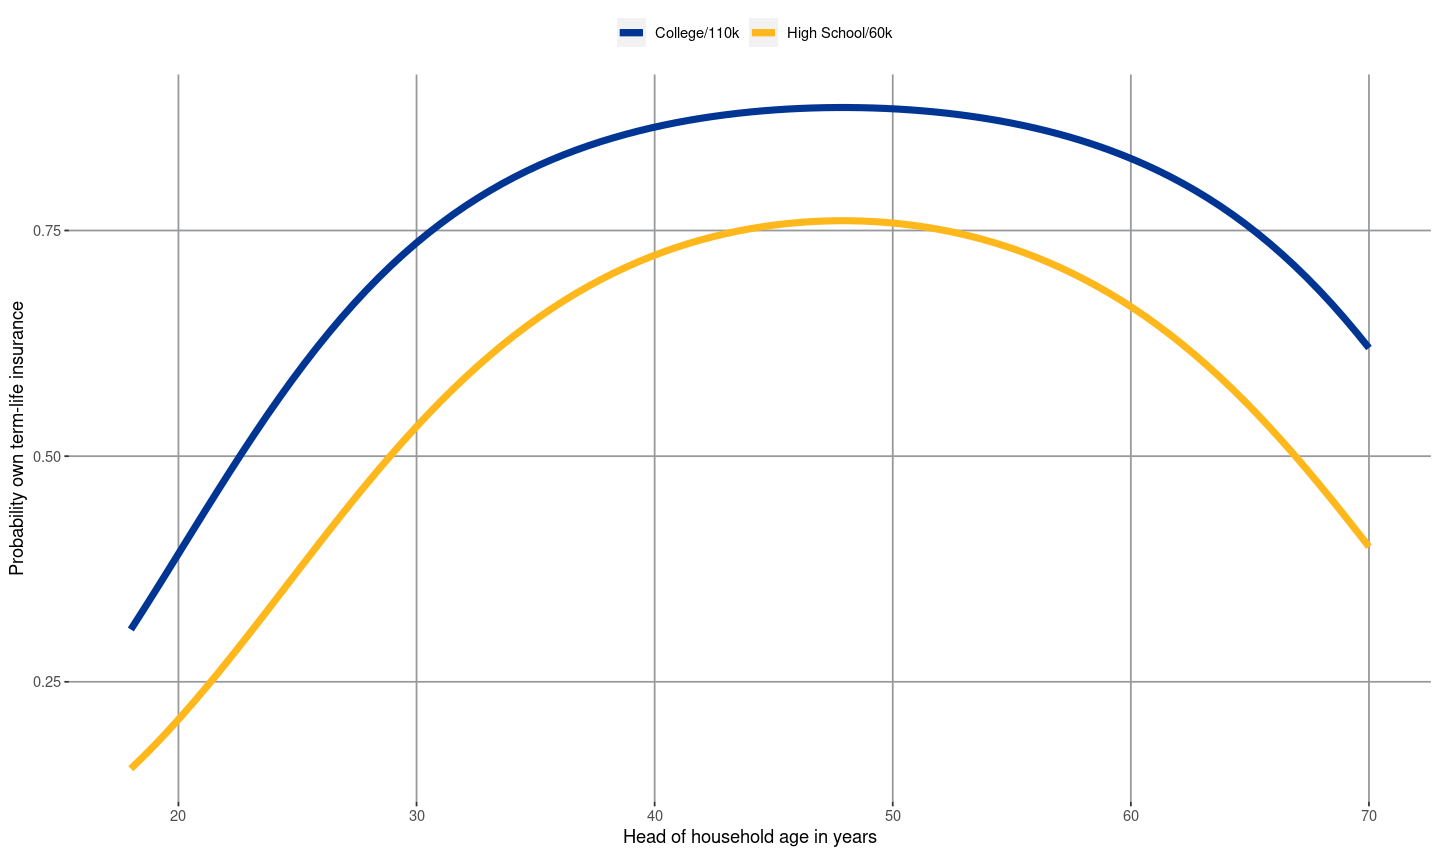

In [10]:
ggplot()+ 
geom_function( fun = logit.prob.age.coll,  size=2,aes(color="College/110k")) + 
geom_function( fun = logit.prob.age.hs,  size=2,aes(color="High School/60k") ) +
xlim(18, 70)+ylab("Probability own term-life insurance")+xlab("Head of household age in years")+Pitt.Theme+theme(legend.position='top')+
scale_color_manual(name='', values=c("College/110k"= Pitt.Blue, "High School/60k"= Pitt.Gold) )

## Qu 3
---
<i>Run a probit regression with the same explanatory variables. Which of the probit or logit models has a better fit to the data?</i>

**Answer:**
So, let's run a probit estimation on the same model:

In [11]:
probit.est <- glm(Owns.Term.Life ~education + hhsize+log(income)+age +I(age**2), data=Quiz4Data,family = "binomial"(link="probit"))
beta.probit <- coef(probit.est)

In [12]:
cbind(
  logit=c(log.likelihood=logLik(logit.est),model.params=length(beta.logit),Akaike.inf.crit=AIC(logit.est),Bayes.inf.crit=BIC(logit.est)),
  probit=c(log.likelihood=logLik(probit.est),model.params=length(beta.probit),Akaike.inf.crit=AIC(probit.est),Bayes.inf.crit=BIC(probit.est))
)

,logit,probit
log.likelihood,-1146.445,-1146.940
model.params,7.000,7.000
Akaike.inf.crit,2306.891,2307.880
Bayes.inf.crit,2346.097,2347.086


So the logit has a higher likelihood on organizing the same data. Because both models have the same data size and number of parameters, they therefore also have idential ordering on the AIC and BIC (which are lower/better for the logit). 

**We therefore select the logit model!**

## Qu 4
---
<i>Returning to your logit regression, what is the **average marginal effect** on the chance of owning term life from an increase of the household size by one?</i>

**Answer:**
So, let's run a probit estimation on the same model:

In [13]:
library(margins)
summary( margins( logit.est, type='response' ) )
sum.margins <- summary( margins( logit.est, type='response' ) )

,factor,AME,SE,z,p,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,age,2.200611e-02,1.335417e-03,16.478823,5.208923e-61,1.938874e-02,2.462348e-02
2,educationgrad.degree,9.730953e-02,4.083637e-02,2.382914,1.717623e-02,1.727172e-02,1.773473e-01
3,educationhs,-1.617244e-01,2.353543e-02,-6.871528,6.351778e-12,-2.078529e-01,-1.155958e-01
4,hhsize,6.630726e-02,9.313540e-03,7.119448,1.083601e-12,4.805306e-02,8.456146e-02
5,income,8.273767e-07,6.015695e-07,1.375363,1.690188e-01,-3.516779e-07,2.006431e-06


So the household size average marginal effect is a 6.6 percent increase in the chance of owning term life for each additional household member.

In [14]:
sum.margins[4,"AME"]

hhsize 
0.06630726

## Qu 5
---
<i>If you were trying to target households without term-life who you thought would want to in the near future, what characteristics would your analysis suggest you should be looking for? Explain your reasoning.</i>

**Answer:**
Here I think the graph and the marginal effects are most informative. It looks like people already have policies by the time they're about 45, so I'd probably thin about targeting households with kids where the decisions makers were perhaps in their early thirties. Obviously you want to target more educated households, but you want to think about what the slopes are in the graph: where the slope is steepest, these are regions where people who will eventually acquire term-life begin to buy.  To me the slopes look fairly similar, where the size of the market without college education is maybe slightly larger.

Being in your early thirties is likely going to be pretty correlated with increasing income, and family responsibilities, where I think this would likely be easier/less costly to target than income. 

If I was feeling a bit crueler here I would have given you some costs for targeted advertising, where I would have asked you to use the model to formulate the optimal marketing strategy.

### Example
For example, we can think of targeting new parents where the model specifies a likelihood of acquiring term life after increasing household size from 2 to 4 for a 33 year old with 70k in income with/without a  college degree of:

In [15]:
logit.prob.age.coll(33,income=70000,hhsize=3)-logit.prob.age.coll(33,income=70000,hhsize=2)
logit.prob.age.hs(33,income=70000,hhsize=3)-logit.prob.age.hs(33,income=70000,hhsize=2)

[1] 0.07370899

[1] 0.08483916

So the model predicts about 7-8 percent of households will acquire a policy after a new household member is added.

But what is the change in the probability of acquiring term life across each year of age?

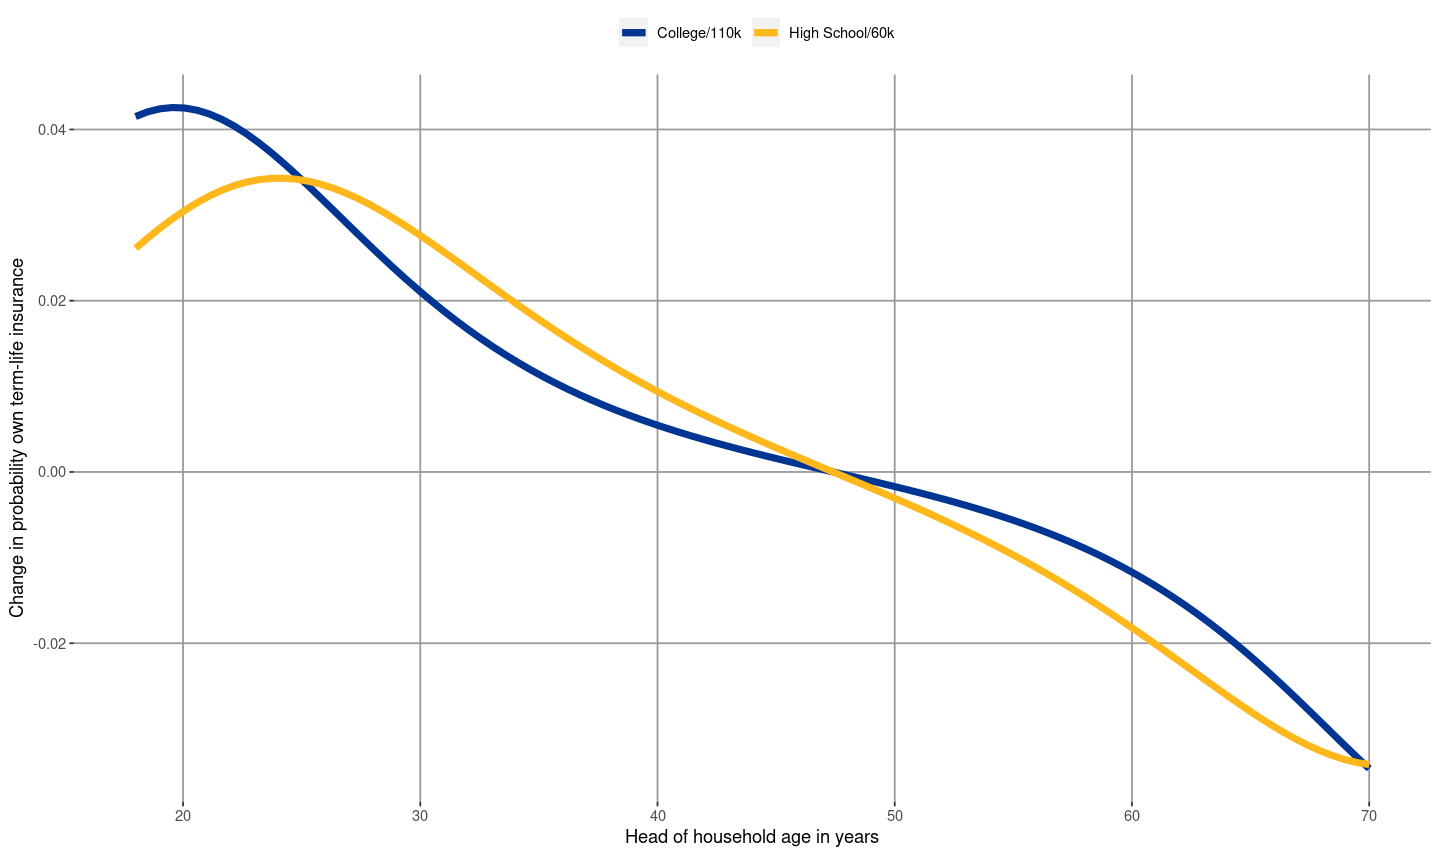

In [16]:
ggplot()+ 
geom_function( fun = function(age) logit.prob.age.coll(age+1)-logit.prob.age.coll(age),  size=2,aes(color="College/110k")) + 
geom_function( fun = function(age) logit.prob.age.hs(age+1)-logit.prob.age.hs(age),  size=2,aes(color="High School/60k") ) +
xlim(18, 70)+ylab("Change in probability own term-life insurance")+xlab("Head of household age in years")+Pitt.Theme+theme(legend.position='top')+
scale_color_manual(name='', values=c("College/110k"= Pitt.Blue, "High School/60k"= Pitt.Gold) )

So, if it's cheaper (less than a quarter of the price per unit) to just market towards 20-35 year olds, this might be the superior strategy, as this seems like the group who will be experiencing household size increases too!